# File 3C: Neural Network Model
## Stock Price Volatility & Sentiment ML Project

**Purpose:** Train and evaluate Neural Network model

**What is a Neural Network?**
- Deep learning approach with multiple layers
- Can learn complex, non-linear patterns
- Inspired by biological neurons
- Uses backpropagation for learning

**Architecture:**
- **Full features:** Input(23) → Hidden(50) → Hidden(25) → Output(1)
- **PCA features:** Input(7) → Hidden(20) → Hidden(10) → Output(1)

**We'll train:**
- Model with full features (23 features)
- Model with PCA features (7 components)

---

## Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('✅ Libraries loaded successfully!')

✅ Libraries loaded successfully!


## Step 2: Load Preprocessed Data

In [2]:
print('='*70)
print('LOADING PREPROCESSED DATA')
print('='*70)

# UPDATE THIS PATH
processed_dir = '/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/data/processed'

# Load training and testing data
X_train = np.load(f'{processed_dir}/X_train_scaled.npy')
X_test = np.load(f'{processed_dir}/X_test_scaled.npy')
X_train_pca = np.load(f'{processed_dir}/X_train_pca.npy')
X_test_pca = np.load(f'{processed_dir}/X_test_pca.npy')
y_train = np.load(f'{processed_dir}/y_train.npy')
y_test = np.load(f'{processed_dir}/y_test.npy')

print('\n✅ Data loaded successfully!')
print(f'\nData shapes:')
print(f'   X_train (full): {X_train.shape}')
print(f'   X_test (full): {X_test.shape}')
print(f'   X_train (PCA): {X_train_pca.shape}')
print(f'   X_test (PCA): {X_test_pca.shape}')
print(f'   y_train: {y_train.shape}')
print(f'   y_test: {y_test.shape}')

print(f'\nTarget distribution:')
print(f'   Train - Up: {y_train.sum()}/{len(y_train)} ({y_train.mean()*100:.1f}%)')
print(f'   Test - Up: {y_test.sum()}/{len(y_test)} ({y_test.mean()*100:.1f}%)')

LOADING PREPROCESSED DATA

✅ Data loaded successfully!

Data shapes:
   X_train (full): (2964, 23)
   X_test (full): (741, 23)
   X_train (PCA): (2964, 7)
   X_test (PCA): (741, 7)
   y_train: (2964,)
   y_test: (741,)

Target distribution:
   Train - Up: 1547/2964 (52.2%)
   Test - Up: 388/741 (52.4%)


## Step 3: Train Neural Network with Full Features

**Neural Network Hyperparameters:**
- **Architecture:** 23 → 50 → 25 → 1
- **Activation:** ReLU (Rectified Linear Unit)
- **Solver:** Adam (adaptive learning rate)
- **Max iterations:** 500
- **Early stopping:** Enabled (stops if no improvement)

In [3]:
print('\n' + '='*70)
print('TRAINING NEURAL NETWORK - FULL FEATURES')
print('='*70)

print('\nArchitecture:')
print('   Input layer: 23 features')
print('   Hidden layer 1: 50 neurons (ReLU activation)')
print('   Hidden layer 2: 25 neurons (ReLU activation)')
print('   Output layer: 1 neuron (sigmoid activation)')

print('\nHyperparameters:')
print('   - Solver: Adam')
print('   - Max iterations: 500')
print('   - Early stopping: Enabled')
print('   - Validation fraction: 10%')
print('   - Random state: 42')

# Create and train model
nn_model = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=False
)

print('\n⏳ Training Neural Network...')
nn_model.fit(X_train, y_train)

print('✅ Model trained successfully!')
print(f'   Total iterations: {nn_model.n_iter_}')
print(f'   Training loss: {nn_model.loss_:.4f}')


TRAINING NEURAL NETWORK - FULL FEATURES

Architecture:
   Input layer: 23 features
   Hidden layer 1: 50 neurons (ReLU activation)
   Hidden layer 2: 25 neurons (ReLU activation)
   Output layer: 1 neuron (sigmoid activation)

Hyperparameters:
   - Solver: Adam
   - Max iterations: 500
   - Early stopping: Enabled
   - Validation fraction: 10%
   - Random state: 42

⏳ Training Neural Network...
✅ Model trained successfully!
   Total iterations: 12
   Training loss: 0.6851


## Step 4: Evaluate Full Features Model

In [4]:
# Make predictions
y_pred_train = nn_model.predict(X_train)
y_pred_test = nn_model.predict(X_test)

# Calculate accuracy
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print('='*70)
print('RESULTS - FULL FEATURES MODEL')
print('='*70)
print(f'\n📊 Training Accuracy: {train_acc*100:.2f}%')
print(f'📊 Testing Accuracy: {test_acc*100:.2f}%')

# Check overfitting
diff = train_acc - test_acc
if diff > 0.05:
    print(f'\n⚠️  Overfitting detected! Difference: {diff*100:.2f}%')
elif diff < -0.05:
    print(f'\n⚠️  Underfitting detected! Difference: {diff*100:.2f}%')
else:
    print(f'\n✅ Good fit! Difference: {diff*100:.2f}%')

# Check target achievement
if test_acc >= 0.55:
    print(f'✅ Target accuracy (55%) ACHIEVED!')
else:
    print(f'⚠️  Below target accuracy (55%)')

RESULTS - FULL FEATURES MODEL

📊 Training Accuracy: 51.35%
📊 Testing Accuracy: 51.15%

✅ Good fit! Difference: 0.20%
⚠️  Below target accuracy (55%)


In [5]:
# Detailed classification report
print('\n' + '='*70)
print('DETAILED CLASSIFICATION REPORT')
print('='*70)
print(classification_report(y_test, y_pred_test, 
                          target_names=['Down (0)', 'Up (1)'],
                          digits=4))


DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Down (0)     0.4828    0.3569    0.4104       353
      Up (1)     0.5271    0.6521    0.5829       388

    accuracy                         0.5115       741
   macro avg     0.5049    0.5045    0.4967       741
weighted avg     0.5060    0.5115    0.5008       741



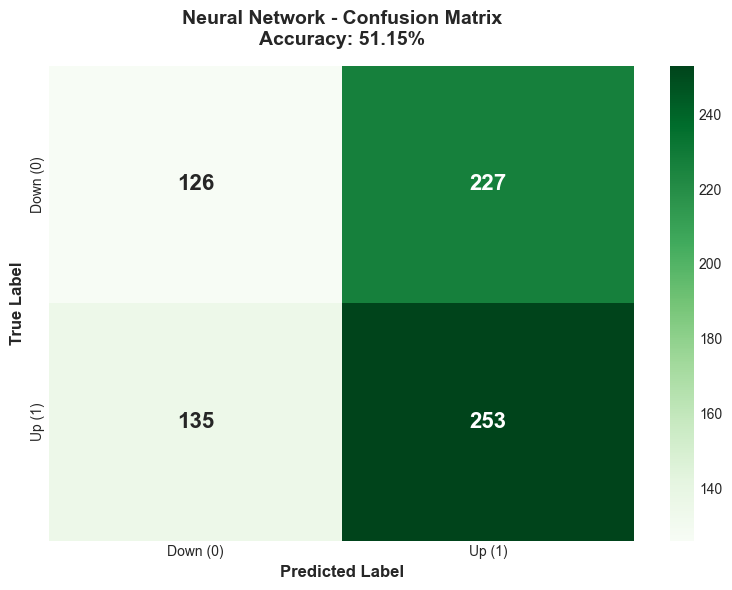

✅ Saved: 03C_nn_confusion_matrix.png


In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Down (0)', 'Up (1)'],
            yticklabels=['Down (0)', 'Up (1)'],
            annot_kws={'size': 16, 'weight': 'bold'})

plt.title(f'Neural Network - Confusion Matrix\nAccuracy: {test_acc*100:.2f}%',
         fontsize=14, fontweight='bold', pad=15)
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/03C_nn_confusion_matrix.png',
           dpi=300, bbox_inches='tight')
plt.show()

print('✅ Saved: 03C_nn_confusion_matrix.png')

## Step 5: Training Loss Curve

Let's visualize how the neural network learned over time.

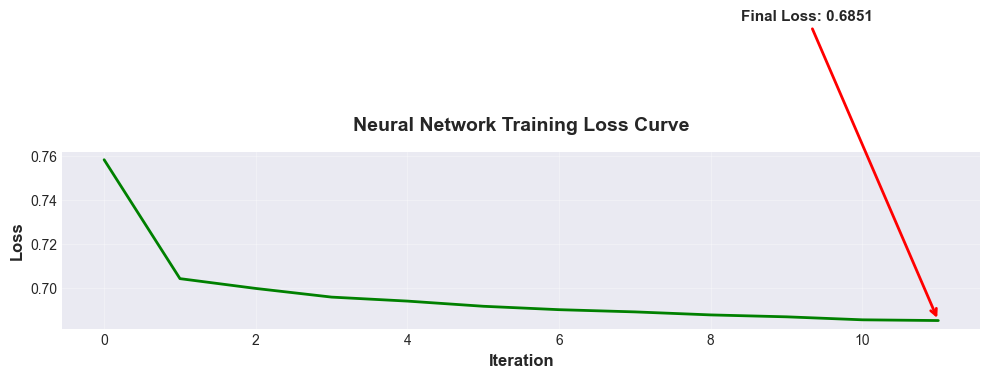

✅ Saved: 03C_nn_loss_curve.png


In [7]:
# Plot loss curve
plt.figure(figsize=(10, 6))
plt.plot(nn_model.loss_curve_, linewidth=2, color='green')
plt.xlabel('Iteration', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.title('Neural Network Training Loss Curve', fontsize=14, fontweight='bold', pad=15)
plt.grid(alpha=0.3)

# Add annotation for final loss
plt.annotate(f'Final Loss: {nn_model.loss_:.4f}',
            xy=(len(nn_model.loss_curve_)-1, nn_model.loss_curve_[-1]),
            xytext=(len(nn_model.loss_curve_)*0.7, nn_model.loss_curve_[-1]*1.2),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/03C_nn_loss_curve.png',
           dpi=300, bbox_inches='tight')
plt.show()

print('✅ Saved: 03C_nn_loss_curve.png')

## Step 6: Train Neural Network with PCA Features

In [8]:
print('\n' + '='*70)
print('TRAINING NEURAL NETWORK - PCA FEATURES')
print('='*70)

print('\nArchitecture:')
print('   Input layer: 7 PCA components')
print('   Hidden layer 1: 20 neurons (ReLU activation)')
print('   Hidden layer 2: 10 neurons (ReLU activation)')
print('   Output layer: 1 neuron (sigmoid activation)')

# Create and train model with PCA features
nn_model_pca = MLPClassifier(
    hidden_layer_sizes=(20, 10),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=False
)

print('\n⏳ Training Neural Network with PCA...')
nn_model_pca.fit(X_train_pca, y_train)

print('✅ PCA model trained successfully!')
print(f'   Total iterations: {nn_model_pca.n_iter_}')
print(f'   Training loss: {nn_model_pca.loss_:.4f}')


TRAINING NEURAL NETWORK - PCA FEATURES

Architecture:
   Input layer: 7 PCA components
   Hidden layer 1: 20 neurons (ReLU activation)
   Hidden layer 2: 10 neurons (ReLU activation)
   Output layer: 1 neuron (sigmoid activation)

⏳ Training Neural Network with PCA...
✅ PCA model trained successfully!
   Total iterations: 13
   Training loss: 0.6963


In [9]:
# Evaluate PCA model
y_pred_pca_test = nn_model_pca.predict(X_test_pca)
test_acc_pca = accuracy_score(y_test, y_pred_pca_test)

print('='*70)
print('RESULTS - PCA MODEL')
print('='*70)
print(f'\n📊 Testing Accuracy (PCA): {test_acc_pca*100:.2f}%')

# Compare with full features
print(f'\n🔄 Comparison:')
print(f'   Full features (23): {test_acc*100:.2f}%')
print(f'   PCA features (7): {test_acc_pca*100:.2f}%')
print(f'   Difference: {(test_acc - test_acc_pca)*100:.2f}%')

print(f'\n📈 Training efficiency:')
print(f'   Full features iterations: {nn_model.n_iter_}')
print(f'   PCA iterations: {nn_model_pca.n_iter_}')

if test_acc_pca >= test_acc * 0.95:
    print(f'\n✅ PCA maintains good performance with fewer features!')
else:
    print(f'\n⚠️  PCA significantly reduces performance')

RESULTS - PCA MODEL

📊 Testing Accuracy (PCA): 48.45%

🔄 Comparison:
   Full features (23): 51.15%
   PCA features (7): 48.45%
   Difference: 2.70%

📈 Training efficiency:
   Full features iterations: 12
   PCA iterations: 13

⚠️  PCA significantly reduces performance


## Step 7: Compare Loss Curves

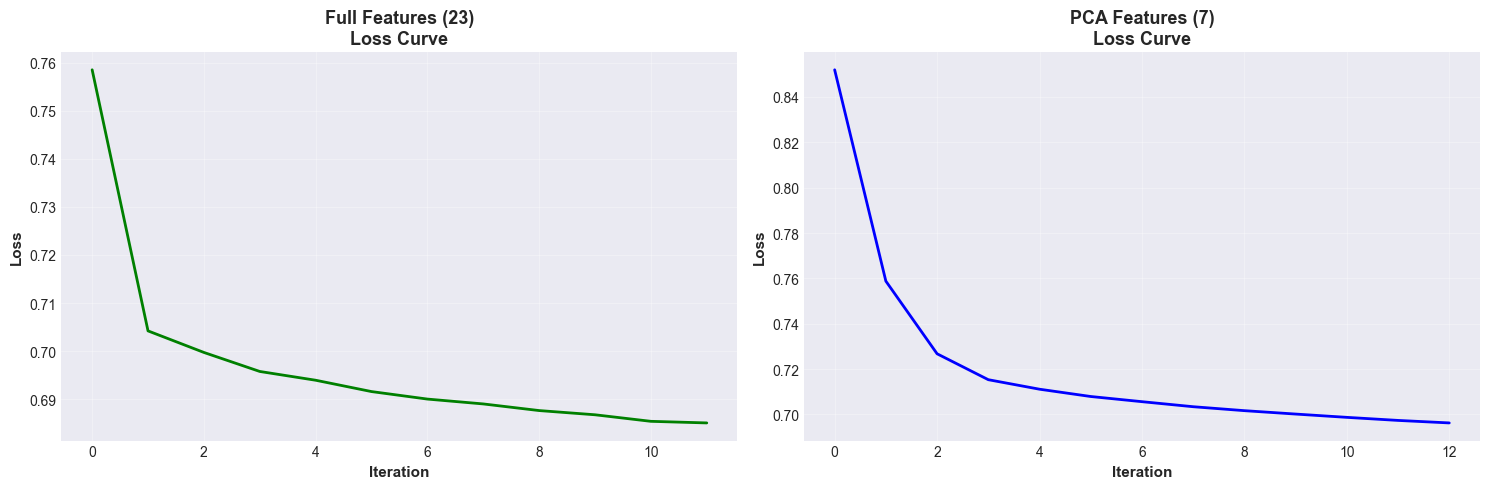

✅ Saved: 03C_nn_loss_comparison.png


In [10]:
# Compare loss curves
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Full features
axes[0].plot(nn_model.loss_curve_, linewidth=2, color='green')
axes[0].set_xlabel('Iteration', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=11, fontweight='bold')
axes[0].set_title('Full Features (23)\nLoss Curve', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3)

# PCA features
axes[1].plot(nn_model_pca.loss_curve_, linewidth=2, color='blue')
axes[1].set_xlabel('Iteration', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Loss', fontsize=11, fontweight='bold')
axes[1].set_title('PCA Features (7)\nLoss Curve', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/03C_nn_loss_comparison.png',
           dpi=300, bbox_inches='tight')
plt.show()

print('✅ Saved: 03C_nn_loss_comparison.png')

## Step 8: ROC Curve

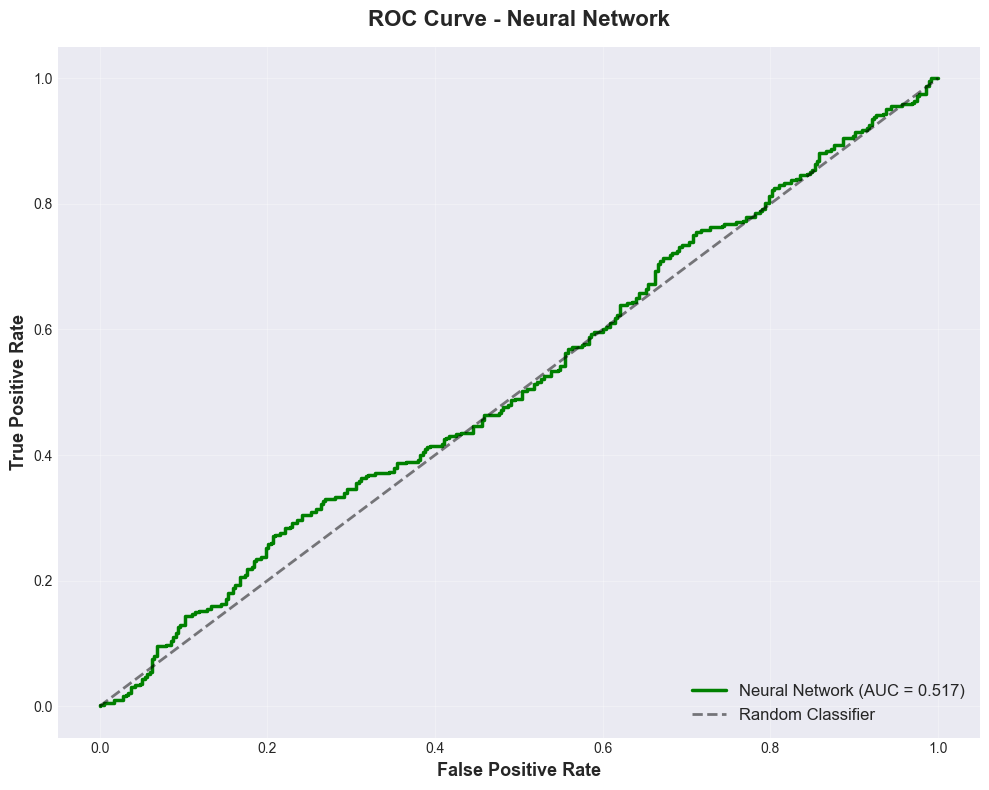

✅ Saved: 03C_nn_roc_curve.png

📊 AUC Score: 0.5167


In [11]:
# Calculate ROC curve
y_pred_proba = nn_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', linewidth=2.5, label=f'Neural Network (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier', alpha=0.5)

plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=13, fontweight='bold')
plt.title('ROC Curve - Neural Network', fontsize=16, fontweight='bold', pad=15)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/03C_nn_roc_curve.png',
           dpi=300, bbox_inches='tight')
plt.show()

print('✅ Saved: 03C_nn_roc_curve.png')
print(f'\n📊 AUC Score: {roc_auc:.4f}')

## Step 9: Network Architecture Visualization

NEURAL NETWORK ARCHITECTURE SUMMARY

[Full Features Model]
   Input Layer: 23 neurons
   Hidden Layer 1: 50 neurons
   Hidden Layer 2: 25 neurons
   Output Layer: 1 neuron
   Total Parameters: ~2,501

[PCA Model]
   Input Layer: 7 neurons
   Hidden Layer 1: 20 neurons
   Hidden Layer 2: 10 neurons
   Output Layer: 1 neuron
   Total Parameters: ~381


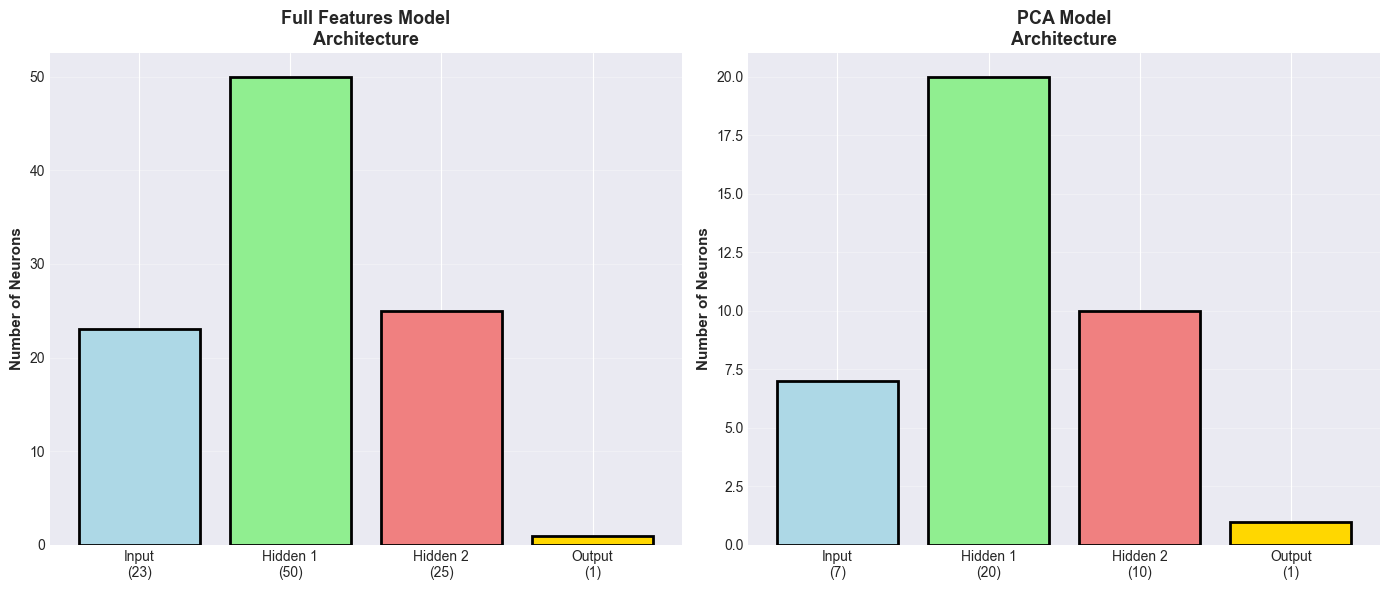


✅ Saved: 03C_nn_architecture.png


In [12]:
print('='*70)
print('NEURAL NETWORK ARCHITECTURE SUMMARY')
print('='*70)

print('\n[Full Features Model]')
print(f'   Input Layer: 23 neurons')
print(f'   Hidden Layer 1: 50 neurons')
print(f'   Hidden Layer 2: 25 neurons')
print(f'   Output Layer: 1 neuron')
print(f'   Total Parameters: ~{(23*50 + 50*25 + 25*1 + 50 + 25 + 1):,}')

print('\n[PCA Model]')
print(f'   Input Layer: 7 neurons')
print(f'   Hidden Layer 1: 20 neurons')
print(f'   Hidden Layer 2: 10 neurons')
print(f'   Output Layer: 1 neuron')
print(f'   Total Parameters: ~{(7*20 + 20*10 + 10*1 + 20 + 10 + 1):,}')

# Visualize architecture
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Full features architecture
layers_full = [23, 50, 25, 1]
layer_names_full = ['Input\n(23)', 'Hidden 1\n(50)', 'Hidden 2\n(25)', 'Output\n(1)']
axes[0].bar(range(len(layers_full)), layers_full, color=['lightblue', 'lightgreen', 'lightcoral', 'gold'], 
           edgecolor='black', linewidth=2)
axes[0].set_xticks(range(len(layers_full)))
axes[0].set_xticklabels(layer_names_full)
axes[0].set_ylabel('Number of Neurons', fontsize=11, fontweight='bold')
axes[0].set_title('Full Features Model\nArchitecture', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

# PCA architecture
layers_pca = [7, 20, 10, 1]
layer_names_pca = ['Input\n(7)', 'Hidden 1\n(20)', 'Hidden 2\n(10)', 'Output\n(1)']
axes[1].bar(range(len(layers_pca)), layers_pca, color=['lightblue', 'lightgreen', 'lightcoral', 'gold'], 
           edgecolor='black', linewidth=2)
axes[1].set_xticks(range(len(layers_pca)))
axes[1].set_xticklabels(layer_names_pca)
axes[1].set_ylabel('Number of Neurons', fontsize=11, fontweight='bold')
axes[1].set_title('PCA Model\nArchitecture', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/visualizations/03C_nn_architecture.png',
           dpi=300, bbox_inches='tight')
plt.show()

print('\n✅ Saved: 03C_nn_architecture.png')

## Step 10: Save Models

In [13]:
print('='*70)
print('SAVING MODELS')
print('='*70)

# Create models directory
import os
models_dir = '/Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/models'
os.makedirs(models_dir, exist_ok=True)

# Save both models
joblib.dump(nn_model, f'{models_dir}/neural_network.pkl')
joblib.dump(nn_model_pca, f'{models_dir}/neural_network_pca.pkl')

print('\n✅ Models saved successfully!')
print(f'   - neural_network.pkl')
print(f'   - neural_network_pca.pkl')
print(f'\nLocation: {models_dir}')

SAVING MODELS

✅ Models saved successfully!
   - neural_network.pkl
   - neural_network_pca.pkl

Location: /Users/aryan/Desktop/Stock-Price-Volatility-Sentiment-ML/models
